### 1. 라이브러리 불러오기

In [18]:
import warnings
warnings.filterwarnings(action="ignore")

In [19]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline

###  2. 데이터 불러오기 및 분리

In [5]:
imageList = []
labelList = []
IMG_SIZE = 48

In [101]:
basedir = "../images/emotion_f/input/train/"
basedir_gen = "../images/UTKFace/gender/"
basedir_wiki = "../images/wiki_crop/"
basedir_age = "../images/UTKFace/age/"

In [81]:
featuresData = pd.read_csv("../images/wiki_crop/meta.tsv",delimiter="\t")

In [82]:
testFeature.loc[ 0 , :].full_path

'17/10000217_1981-05-05_2009.jpg'

In [102]:
categories = os.listdir(basedir)
categories_gen = os.listdir(basedir_gen)
categories_age = os.listdir(basedir_age)
print(categories)
print(categories_gen)
print(categories_age)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
['0', '1']
['1', '10', '100', '101', '103', '105', '11', '110', '111', '115', '116', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '95', '96', '99']


### 기존 이미지 로드 함수

In [104]:
def imageLoad(basedir,IMG_SIZE):
    imageList = []
    labelList = []
    categories = os.listdir(basedir)
    #폴더 순환
    for i in range(0, len(categories)):

        labelPath = os.path.join(basedir,categories[i])
        imagePath = os.listdir(labelPath)
        #이미지 순환
        for j in range(0,len(imagePath)):
            imageFullPath = os.path.join(labelPath, imagePath[j])
            try:
                baseimg = cv2.imread(imageFullPath,cv2.IMREAD_GRAYSCALE)
                ### 1. 이미지 사이즈 변경
                ### 2. 이미지 칼러 변경(이미 완료)
                refinedImg = cv2.resize(baseimg, (IMG_SIZE,IMG_SIZE))
                #plt.imshow(refinedImg)
                imageList.append(refinedImg)
                labelList.append(i)
            except Exception as e:
                print(e, imageFullPath)
                pass

    imageArray = np.array(imageList)
    labelArray = np.array(labelList)
    return imageArray, labelArray

### WIKI에서 데이터 가지고 오는 함수

In [92]:

##wifi 데이터 가지고 오는 함수, 
def imageLoad_gender(basedir,IMG_SIZE,rows):
    imageList = []
    labelList = []
    
    
    #폴더 순환
    for i in range(0, 2):
        imgFeatures= featuresData[featuresData.gender==i].head(rows).reset_index(drop=True)
        
        #이미지 순환
        for j in range(0,rows):
            imageFullPath = os.path.join(basedir,imgFeatures.loc[ j , :].full_path)
            try:
                baseimg = cv2.imread(imageFullPath,cv2.IMREAD_GRAYSCALE)
                ### 1. 이미지 사이즈 변경
                ### 2. 이미지 칼러 변경(이미 완료)
                refinedImg = cv2.resize(baseimg, (IMG_SIZE,IMG_SIZE))
                #plt.imshow(refinedImg)
                imageList.append(refinedImg)
                labelList.append(i)
            except Exception as e:
                print(e, imageFullPath)
                pass

    imageArray = np.array(imageList)
    labelArray = np.array(labelList)
    return imageArray, labelArray

In [21]:
##감정
imageList,labelList = imageLoad(basedir,48)

In [26]:
##성별
genimageList,genlabelList = imageLoad(basedir_gen,48)

In [105]:
##나이
ageimageList,agelabelList = imageLoad(basedir_age,48)

In [97]:
##성별 wiki crop 에서 데이터를 가지고 온다. 3번째 파라메터가 100일 경우 남, 여 100 건씩 총 200건
##wiki crop은 남여 성별이 다르기 때문에 GENDER_WIKILIST 사용하여 글씨 표기
genimageList,genlabelList = imageLoad_gender(basedir_wiki,48,100)

200
1


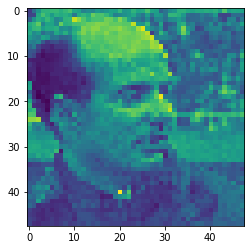

In [98]:
print(len(genimageList))
print(genlabelList[101])
plt.imshow(genimageList[101])

200
0


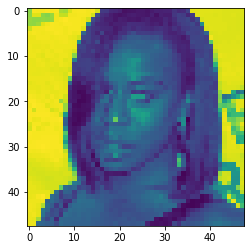

In [91]:
print(len(genimageList))
print(genlabelList[99])
plt.imshow(genimageList[99])

In [27]:
print(imageList.shape)
print(labelList.shape)
print(genimageList.shape)
print(genlabelList.shape)

(114826, 48, 48)
(114826,)
(23708, 48, 48)
(23708,)


In [107]:
from sklearn.model_selection import train_test_split

In [24]:
##감정
trainingData_features,\
testData_features,\
trainingData_labels,\
testData_labels =\
train_test_split(imageList, labelList, test_size= 0.2, random_state=2)

In [28]:
##성별
gentrainingData_features,\
gentestData_features,\
gentrainingData_labels,\
gentestData_labels =\
train_test_split(genimageList, genlabelList, test_size= 0.2, random_state=2)

In [108]:
##나이
agetrainingData_features,\
agetestData_features,\
agetrainingData_labels,\
agetestData_labels =\
train_test_split(ageimageList, agelabelList, test_size= 0.2, random_state=2)

In [25]:
print(trainingData_features.shape)
print(testData_features.shape)
print(trainingData_labels.shape)
print(testData_labels.shape)

(91860, 48, 48)
(22966, 48, 48)
(91860,)
(22966,)


In [29]:
print(gentrainingData_features.shape)
print(gentestData_features.shape)
print(gentrainingData_labels.shape)
print(gentestData_labels.shape)


(18966, 48, 48)
(4742, 48, 48)
(18966,)
(4742,)


In [109]:
print(agetrainingData_features.shape)
print(agetestData_features.shape)
print(agetrainingData_labels.shape)
print(agetestData_labels.shape)

(18966, 48, 48)
(4742, 48, 48)
(18966,)
(4742,)


In [30]:
##감정
trainingData_features = trainingData_features.reshape(len(trainingData_features),IMG_SIZE,IMG_SIZE,1)
testData_features = testData_features.reshape(len(testData_features),IMG_SIZE,IMG_SIZE,1)

In [31]:
##성별
gentrainingData_features = gentrainingData_features.reshape(len(gentrainingData_features),IMG_SIZE,IMG_SIZE,1)
gentestData_features = gentestData_features.reshape(len(gentestData_features),IMG_SIZE,IMG_SIZE,1)

In [110]:
##감정
agetrainingData_features = agetrainingData_features.reshape(len(agetrainingData_features),IMG_SIZE,IMG_SIZE,1)
agetestData_features = agetestData_features.reshape(len(agetestData_features),IMG_SIZE,IMG_SIZE,1)

In [32]:
print(trainingData_features.shape)
print(testData_features.shape)
print(trainingData_labels.shape)
print(testData_labels.shape)
print(gentrainingData_features.shape)
print(gentestData_features.shape)
print(gentrainingData_labels.shape)
print(gentestData_labels.shape)

(91860, 48, 48, 1)
(22966, 48, 48, 1)
(91860,)
(22966,)
(18966, 48, 48, 1)
(4742, 48, 48, 1)
(18966,)
(4742,)


In [33]:
##감정 일반화
trainingData_features_norm = trainingData_features/255.0
testData_features_norm = testData_features/255.0

In [34]:
##성별 일반화
gentrainingData_features_norm = gentrainingData_features/255.0
gentestData_features_norm = gentestData_features/255.0

In [111]:
##나이 일반화
agetrainingData_features_norm = agetrainingData_features/255.0
agetestData_features_norm = agetestData_features/255.0

In [35]:
##감정 원핫
from tensorflow.keras.utils import to_categorical
trainingData_labels_one = to_categorical(trainingData_labels)
testData_labels_one = to_categorical(testData_labels)

In [36]:
##성별 원핫
from tensorflow.keras.utils import to_categorical
gentrainingData_labels_one = to_categorical(gentrainingData_labels)
gentestData_labels_one = to_categorical(gentestData_labels)

In [112]:
##나이 원핫
from tensorflow.keras.utils import to_categorical
agetrainingData_labels_one = to_categorical(agetrainingData_labels)
agetestData_labels_one = to_categorical(agetestData_labels)

In [37]:
trainingData_labels_one[0]
gentrainingData_labels_one[0]


array([1., 0.], dtype=float32)

### 3. 모델 생성

In [39]:
##감정
inputShape = trainingData_features[0].shape
inputShape

(48, 48, 1)

In [40]:
outputShape = len(categories)
outputShape

7

In [41]:
##성별
geninputShape = gentrainingData_features[0].shape
geninputShape

genoutputShape = len(categories_gen)
genoutputShape

(48, 48, 1)

In [113]:
##나이
ageinputShape = agetrainingData_features[0].shape
print(ageinputShape)

ageoutputShape = len(categories_age)
print(ageoutputShape)

(48, 48, 1)
104


### 4. 모델 컴파일

In [115]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [63]:

# 모델 생성 시작 감정
model = Sequential()
model.add(Conv2D(filters=32,
                 kernel_size=3,
                 padding="same",
                 activation="relu",
                 input_shape = inputShape
                ))

model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(rate=0.4)) ##사용할 비율을 설정

model.add(Conv2D(filters=32,
                 kernel_size=3,
                 padding="same",
                 activation="relu",
                 input_shape = inputShape
                ))

model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(units=outputShape,
               activation="softmax"))

In [64]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                

In [65]:
# 모델 생성 시작 성별
genmodel = Sequential()
genmodel.add(Conv2D(filters=32,
                 kernel_size=3,
                 padding="same",
                 activation="relu",
                 input_shape = geninputShape
                ))

genmodel.add(MaxPooling2D(pool_size=2))

genmodel.add(Dropout(rate=0.4)) ##사용할 비율을 설정

genmodel.add(Conv2D(filters=32,
                 kernel_size=3,
                 padding="same",
                 activation="relu",
                 input_shape = geninputShape
                ))

genmodel.add(MaxPooling2D(pool_size=2))

genmodel.add(Flatten())

genmodel.add(Dense(units=genoutputShape,
               activation="softmax"))

In [116]:
# 모델 시작 나이
agemodel = Sequential()
agemodel.add(Conv2D(filters=32,
                 kernel_size=3,
                 padding="same",
                 activation="relu",
                 input_shape = ageinputShape
                ))

agemodel.add(MaxPooling2D(pool_size=2))

agemodel.add(Dropout(rate=0.4)) ##사용할 비율을 설정

agemodel.add(Conv2D(filters=32,
                 kernel_size=3,
                 padding="same",
                 activation="relu",
                 input_shape = ageinputShape
                ))

agemodel.add(MaxPooling2D(pool_size=2))

agemodel.add(Flatten())

agemodel.add(Dense(units=ageoutputShape,
               activation="softmax"))

In [117]:
from tensorflow.keras.utils import plot_model

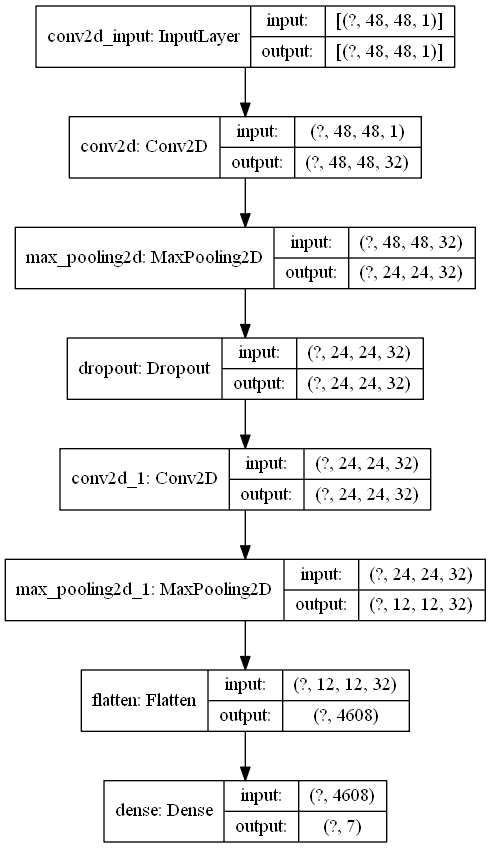

In [40]:
plot_model(model, show_shapes=True)

In [66]:
##loss, merics,optimizer 감정
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])
#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [67]:
##loss, merics,optimizer 성별
genmodel.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])
#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [118]:
##loss, merics,optimizer 나이
agemodel.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])
#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### 5. 모델 학습

In [54]:
epochNo = 5

### 감정 학습은 기존에 저장 된 데이터가 있어 시간이 오래 걸려 학습 중단 했습니다. 

In [68]:
##감정
model.fit(x=trainingData_features_norm,y=trainingData_labels_one, epochs=epochNo,
          batch_size = 32,
         validation_data=(testData_features_norm,testData_labels_one))

Train on 91860 samples, validate on 22966 samples
Epoch 1/5
91860/91860 [==============================] - 154s 2ms/sample - loss: 1.4726 - accuracy: 0.4353 - val_loss: 1.2887 - val_accuracy: 0.5231
Epoch 2/5
37856/91860 [===========>..................] - ETA: 1:28 - loss: 1.2687 - accuracy: 0.5202

KeyboardInterrupt: 

In [69]:
##성별
genmodel.fit(x=gentrainingData_features_norm,y=gentrainingData_labels_one, epochs=epochNo,
          batch_size = 32,
         validation_data=(gentestData_features_norm,gentestData_labels_one))

Train on 18966 samples, validate on 4742 samples
Epoch 1/5
18966/18966 [==============================] - 32s 2ms/sample - loss: 0.4846 - accuracy: 0.7606 - val_loss: 0.3825 - val_accuracy: 0.8342
Epoch 2/5
18966/18966 [==============================] - 32s 2ms/sample - loss: 0.3630 - accuracy: 0.8404 - val_loss: 0.3355 - val_accuracy: 0.8583
Epoch 3/5
18966/18966 [==============================] - 32s 2ms/sample - loss: 0.3333 - accuracy: 0.8539 - val_loss: 0.3394 - val_accuracy: 0.8610
Epoch 4/5
18966/18966 [==============================] - 32s 2ms/sample - loss: 0.3156 - accuracy: 0.8641 - val_loss: 0.3011 - val_accuracy: 0.8749
Epoch 5/5
18966/18966 [==============================] - 32s 2ms/sample - loss: 0.3026 - accuracy: 0.8722 - val_loss: 0.2939 - val_accuracy: 0.8771


### 6. 모델 추론

In [47]:
##감정
model.evaluate(x = testData_features_norm, y = testData_labels_one)

22966/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.0219761762772248, 0.6259688]

In [70]:
##성별
genmodel.evaluate(x = gentestData_features_norm, y = gentestData_labels_one)

4742/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.2939476028920628, 0.8770561]

In [120]:
##나이
epochNo = 5
agemodel.fit(x=agetrainingData_features_norm,y=agetrainingData_labels_one, epochs=epochNo,
          batch_size = 32,
         validation_data=(agetestData_features_norm,agetestData_labels_one))

Train on 18966 samples, validate on 4742 samples
Epoch 1/5
18966/18966 [==============================] - 32s 2ms/sample - loss: 3.9702 - accuracy: 0.1147 - val_loss: 3.9015 - val_accuracy: 0.1217
Epoch 2/5
18966/18966 [==============================] - 33s 2ms/sample - loss: 3.6741 - accuracy: 0.1357 - val_loss: 3.6844 - val_accuracy: 0.1299
Epoch 3/5
18966/18966 [==============================] - 34s 2ms/sample - loss: 3.4411 - accuracy: 0.1543 - val_loss: 3.6128 - val_accuracy: 0.1362
Epoch 4/5
18966/18966 [==============================] - 33s 2ms/sample - loss: 3.2463 - accuracy: 0.1760 - val_loss: 3.5905 - val_accuracy: 0.1348
Epoch 5/5
18966/18966 [==============================] - 33s 2ms/sample - loss: 3.0468 - accuracy: 0.2074 - val_loss: 3.5930 - val_accuracy: 0.1310


### 7. 모델 저장

In [3]:
model_json = model.to_json()
with open("./model_emotion.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("./model_emotion_kopo_weight.h5")

NameError: name 'model' is not defined

In [71]:
gen_model_json = genmodel.to_json()
with open("./model_gender.json", "w") as json_file:
    json_file.write(gen_model_json)

genmodel.save_weights("./model_gender_kopo_weight.h5")

In [121]:
age_model_json = agemodel.to_json()
with open("./model_age.json", "w") as json_file:
    json_file.write(age_model_json)

agemodel.save_weights("./model_age_kopo_weight.h5")

### 8. 이미지 전처리 함수 생성

In [72]:
def refineImage(testImg):
    ## 테스트 이미지 컬러 변경
    ## 컬러이미지 -> 회색톤으로 변경
    IMG_SIZE = 48
    img_gray= cv2.cvtColor(testImg,cv2.COLOR_RGB2GRAY)

    ## 사이즈 조정
    img_resize = cv2.resize(img_gray,(IMG_SIZE,IMG_SIZE))

    ## shape 변경
    img_shape = img_resize.reshape(1,IMG_SIZE,IMG_SIZE,1)

    img_shape.shape

    ## 정규화
    img_norm = img_shape/255.0
    
    return img_norm

### 9. 모델 불러오기

In [4]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline

In [5]:
from tensorflow.keras.models import model_from_json

In [6]:
EMOTIONS_LIST = ["Angry", "Disgust", "Fear", "Happy","Neutral", "Sad", "Surprise"]
EMOTIONS_LIST2 = ["Angry", "Angry", "Fear", "Happy","Neutral", "Sad", "Neutral"]

GENDER_LIST = ["MAN", "WOMAN"]
## wiki crop 데이터는 남여가 숫자가 반대
GENDER_WIKILIST = ["WOMAN", "MAN"]

In [7]:
json_file = open("./model_emotion.json","r")
loaded_model_json = json_file.read()
json_file.close()

In [8]:
loaded_model = model_from_json(loaded_model_json)

In [9]:
loaded_model.load_weights("./model_emotion_kopo_weight.h5")
# testImg = cv2.imread("d:\sample_image.PNG",cv2.IMREAD_COLOR)

### 성별 모델 불러오기

In [10]:
gen_json_file = open("./model_gender.json","r")
gen_loaded_model_json = gen_json_file.read()
gen_json_file.close()

In [11]:
gen_loaded_model = model_from_json(gen_loaded_model_json)

In [12]:
gen_loaded_model.load_weights("./model_gender_kopo_weight.h5")

### 나이 모델 불러오기

In [13]:
age_json_file = open("./model_age.json","r")
age_loaded_model_json = age_json_file.read()
age_json_file.close()

In [14]:
age_loaded_model = model_from_json(age_loaded_model_json)

In [15]:
age_loaded_model.load_weights("./model_age_kopo_weight.h5")

### 10. 이미지 캡쳐(비디오 캡쳐)

In [23]:
import cv2
import sys


font = cv2.FONT_HERSHEY_SIMPLEX
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [24]:
cap = cv2.VideoCapture(0)


while(True):
    
    ret,frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    if ret == False:
        break;
    
    
    key = cv2.waitKey(33)
    ##얼굴 찾기
    faces = faceCascade.detectMultiScale(
        gray, scaleFactor=1.5, minNeighbors=5,
                 minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
    
    # 획득 이미지 회색컬러로 변경
    gray_fr = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # 인식된 얼굴 주위에 사각형 영역 표시
    # haar cascading 통해 face 이미지 추출 후 좌표활용)
    for (x, y, w, h) in faces:
        fc = gray_fr[y:y+h, x:x+w]

        # 획득 이미지 크기조절 및 딥러닝 입력 형태로 변환
        roi = cv2.resize(fc, (48, 48))
        roip = roi.reshape(1,48,48,1)
        roip = roip/255.0
             
        # 예측 감정
        predict = loaded_model.predict(roip)
        # 예측 성별
        genpredict = gen_loaded_model.predict(roip)
        # 나이 예측
        agepredict = age_loaded_model.predict(roip)
        
        # 예측결과 리턴
        pred = EMOTIONS_LIST2[np.argmax(predict)]
        ##성별
        genpred = GENDER_LIST[np.argmax(genpredict)]
        #wiki 크롭은 반대로 남여 순서 반대
        #genpred = GENDER_WIKILIST[np.argmax(genpredict)]
        
        #나이
        agepred = np.argmax(agepredict)
        
        # 예측결과 화면 시연 및 사각형 영역 표시
        cv2.putText(frame, pred+' ' + genpred + ' ' + str(agepred), (x, y), font, 1, (255, 255, 0), 2)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    
    cv2.imshow('color_frame', frame)
    
    if key==27:
        # esc key
        break
        cap.release()
        cv2.destroyAllWindows()
    
    elif key==32:
        cv2.imwrite("d:/capture_rec_images.jpg", frame )
        
cap.release()
cv2.destroyAllWindows()